In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.1.0


## Dataset
### Preparation

In [3]:
!mkdir -p ../data
!kaggle datasets download -d karthickveerakumar/salary-data-simple-linear-regression
!mv salary-data-simple-linear-regression.zip ../data
!kaggle datasets download -d ashydv/advertising-dataset
!mv advertising-dataset.zip ../data

  0%|                                                 | 0.00/378 [00:00<?, ?B/s]
100%|███████████████████████████████████████████| 378/378 [00:00<00:00, 147kB/s]
  0%|                                               | 0.00/1.83k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.83k/1.83k [00:00<00:00, 709kB/s]


## tf.keras
### Linear regression 
#### Dataset:
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

In [4]:
data = pd.read_csv('../data/salary-data-simple-linear-regression.zip')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


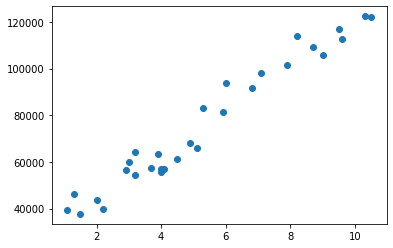

In [5]:
plt.scatter(data.YearsExperience, data.Salary)

In [6]:
x = np.asarray(data.YearsExperience)
y = np.asarray(data.Salary)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

In [9]:
history = model.fit(x, y, epochs=10)

Train on 30 samples
Epoch 1/10
30/30 [==============================] - 0s 6ms/sample - loss: 6504126976.0000
Epoch 2/10
30/30 [==============================] - 0s 27us/sample - loss: 6504115712.0000
Epoch 3/10
30/30 [==============================] - 0s 31us/sample - loss: 6504104960.0000
Epoch 4/10
30/30 [==============================] - 0s 30us/sample - loss: 6504093696.0000
Epoch 5/10
30/30 [==============================] - 0s 24us/sample - loss: 6504082432.0000
Epoch 6/10
30/30 [==============================] - 0s 27us/sample - loss: 6504072192.0000
Epoch 7/10
30/30 [==============================] - 0s 28us/sample - loss: 6504060928.0000
Epoch 8/10
30/30 [==============================] - 0s 31us/sample - loss: 6504049152.0000
Epoch 9/10
30/30 [==============================] - 0s 34us/sample - loss: 6504038400.0000
Epoch 10/10
30/30 [==============================] - 0s 40us/sample - loss: 6504027648.0000


In [10]:
model.predict(x)

array([[ -1.1399592],
       [ -1.3654063],
       [ -1.5908535],
       [ -2.1544712],
       [ -2.3799183],
       [ -3.1689832],
       [ -3.2817068],
       [ -3.5071537],
       [ -3.5071537],
       [ -4.0707717],
       [ -4.296219 ],
       [ -4.408942 ],
       [ -4.408942 ],
       [ -4.5216656],
       [ -4.97256  ],
       [ -5.4234543],
       [ -5.648901 ],
       [ -5.8743486],
       [ -6.5506897],
       [ -6.6634135],
       [ -7.5652018],
       [ -7.9033723],
       [ -8.805161 ],
       [ -9.143332 ],
       [ -9.706949 ],
       [-10.04512  ],
       [-10.608738 ],
       [-10.721462 ],
       [-11.510527 ],
       [-11.735973 ]], dtype=float32)

In [11]:
model.predict(pd.Series([5]))

array([[-5.5361776]], dtype=float32)

### Multilayer Perception
#### Dataset:
https://www.kaggle.com/ashydv/advertising-dataset

In [12]:
data = pd.read_csv('../data/advertising-dataset.zip')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


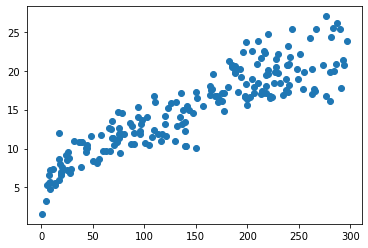

In [13]:
plt.scatter(data.TV, data.Sales)

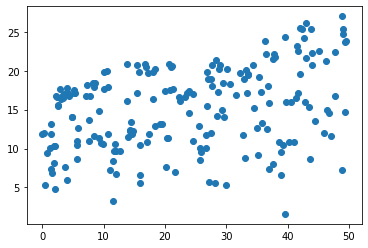

In [14]:
plt.scatter(data.Radio, data.Sales)

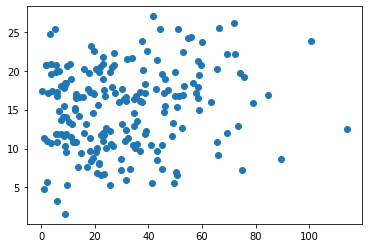

In [15]:
plt.scatter(data.Newspaper, data.Sales)

In [16]:
x = np.asarray(data.iloc[:, 0:-1])
y = np.asarray(data.iloc[:, -1])
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=(3,), activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

In [19]:
history = model.fit(x, y, epochs=10)

Train on 200 samples
Epoch 1/10
200/200 [==============================] - 0s 665us/sample - loss: 6308.7689
Epoch 2/10
200/200 [==============================] - 0s 27us/sample - loss: 2693.7426
Epoch 3/10
200/200 [==============================] - 0s 32us/sample - loss: 1054.9520
Epoch 4/10
200/200 [==============================] - 0s 25us/sample - loss: 343.6504
Epoch 5/10
200/200 [==============================] - 0s 31us/sample - loss: 72.3426
Epoch 6/10
200/200 [==============================] - 0s 26us/sample - loss: 70.3892
Epoch 7/10
200/200 [==============================] - 0s 37us/sample - loss: 34.9306
Epoch 8/10
200/200 [==============================] - 0s 34us/sample - loss: 15.1637
Epoch 9/10
200/200 [==============================] - 0s 25us/sample - loss: 15.2138
Epoch 10/10
200/200 [==============================] - 0s 33us/sample - loss: 13.0546


In [20]:
x_test = np.asarray(data.iloc[:10, 0:-1])
y_test = np.asarray(data.iloc[:10, -1])
model.predict(x_test)

array([[22.47439  ],
       [12.507771 ],
       [12.667095 ],
       [18.946133 ],
       [13.016369 ],
       [12.92557  ],
       [11.391505 ],
       [11.430397 ],
       [ 1.2929194],
       [ 9.293448 ]], dtype=float32)

In [21]:
y_test

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6])

### Logistic Regression
#### Dataset:

In [22]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

### Softmax
#### Dataset: Fashion MNIST
https://www.kaggle.com/zalando-research/fashionmnist

In [25]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [26]:
print(f"Train, Image: {train_image.shape}, label: {train_label.shape}")
print(f"Test, Image: {test_image.shape}, label: {test_label.shape}")

Train, Image: (60000, 28, 28), label: (60000,)
Test, Image: (10000, 28, 28), label: (10000,)


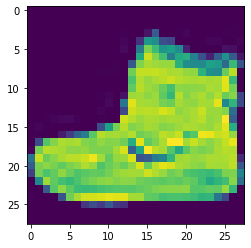

In [27]:
plt.imshow(train_image[0])

In [28]:
# Normalization
train_image = train_image/255
test_image = test_image/255

In [29]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [32]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5075 - accuracy: 0.8212
Epoch 2/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3788 - accuracy: 0.8638
Epoch 3/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3397 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3131 - accuracy: 0.8846
Epoch 5/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2964 - accuracy: 0.8908


In [33]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.3466 - accuracy: 0.8778


[0.3465569431185722, 0.8778]

In [34]:
# Onehot label
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
predict = model.predict(test_image)

In [36]:
predict.shape

(10000, 10)

In [37]:
predict[0]

array([1.8550638e-06, 2.2890271e-08, 7.5098697e-08, 5.5582134e-08,
       5.5977910e-08, 1.1621360e-03, 1.2647396e-06, 2.7055657e-02,
       3.7698817e-06, 9.7177505e-01], dtype=float32)

### Model optimization
- More layers, but potential overfit
- Dropout/Image Augmentation to prevent overfit

In [38]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],S
)

In [42]:
history = model.fit(train_image, train_label_onehot,
                    epochs=10,
                    validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4909 - accuracy: 0.8218 - val_loss: 0.4161 - val_accuracy: 0.8518
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3676 - accuracy: 0.8646 - val_loss: 0.3940 - val_accuracy: 0.8608
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3292 - accuracy: 0.8778 - val_loss: 0.3830 - val_accuracy: 0.8663
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3085 - accuracy: 0.8850 - val_loss: 0.3834 - val_accuracy: 0.8629
Epoch 5/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2900 - accuracy: 0.8916 - val_loss: 0.3572 - val_accuracy: 0.8686
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2754 - accuracy: 0.8969 - val_loss: 0.3549 - val_accuracy: 0.8726
Epoch 7/10
60000/60000 [==============================] 

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

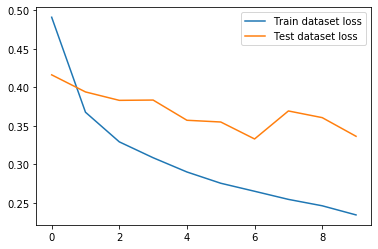

In [44]:
## Overfit, loss
plt.plot(history.epoch, history.history.get('loss'), label='Train dataset loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='Test dataset loss')
plt.legend()

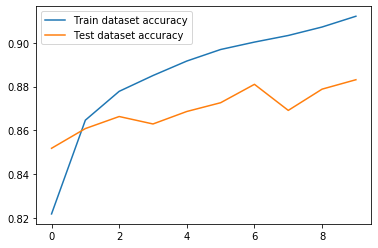

In [45]:
## Overfit, Accuracy
plt.plot(history.epoch, history.history.get('accuracy'), label='Train dataset accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='Test dataset accuracy')
plt.legend()

In [46]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [48]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [49]:
history = model.fit(train_image, train_label_onehot,
                   epochs=10,
                   validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.8793 - accuracy: 0.6725 - val_loss: 0.5299 - val_accuracy: 0.8009
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6143 - accuracy: 0.7836 - val_loss: 0.4754 - val_accuracy: 0.8356
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5736 - accuracy: 0.7990 - val_loss: 0.4507 - val_accuracy: 0.8393
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5433 - accuracy: 0.8083 - val_loss: 0.4341 - val_accuracy: 0.8419
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5273 - accuracy: 0.8141 - val_loss: 0.4535 - val_accuracy: 0.8398
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5198 - accuracy: 0.8188 - val_loss: 0.4392 - val_accuracy: 0.8460
Epoch 7/10
60000/60000 [==============================] 

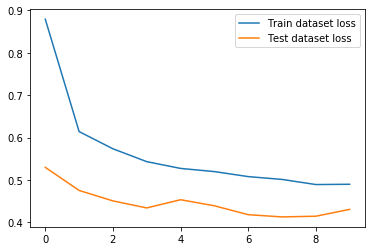

In [50]:
## Overfit, loss
plt.plot(history.epoch, history.history.get('loss'), label='Train dataset loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='Test dataset loss')
plt.legend()

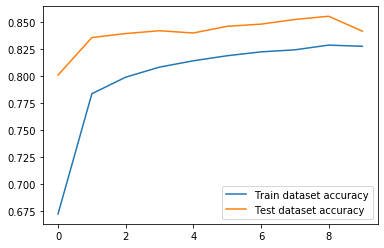

In [51]:
## Overfit, Accuracy
plt.plot(history.epoch, history.history.get('accuracy'), label='Train dataset accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='Test dataset accuracy')
plt.legend()

## End of this file